# 이미지 data_set을 이용한 CNN Modeling

- google drive mount

- dogs and cats image_data
    - train_data = 2000(1000_dogs, 1000_cats)
    - valid_data = 1000(500_dogs, 500_cats)
    - test_data = 1000(500_dogs, 500_cats)

In [1]:
import warnings
warnings.filterwarnings('ignore')

- import tensorflow&keras

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

- GPU 설정 확인

In [3]:
print('CPU Information -' , tf.test.gpu_device_name(), '\n')

!nvidia-smi

CPU Information - /device:GPU:0 

Thu Sep 30 06:50:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    58W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

# 1. Google Drive Mount
- 'dogs and cats small.zip' 디렉토리를 구글드라이브에 업로드

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- 마운트 결과 확인

In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar 31  2021 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


# 2. Data Preprocessing

## 1) Unzip 'dogs_and_cats_small.zip'

In [9]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [10]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 06:51 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 06:53 test
drwxr-xr-x 4 root root 4096 Sep 30 06:53 train
drwxr-xr-x 4 root root 4096 Sep 30 06:53 validation


## 2) Image_File Directory Setting

- train_dir
- valid_dir
- test_dir

In [11]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

## 3) ImageDataGenerator() & flow_from_directory()

- normalization
    - ImageDataGenerator()
- Resizeing & Generator
    - flow_from_directory()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                valid_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 4) Test train_generator

In [13]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 :', data_batch.shape)
    print('배치 레이블 크기 :', labels_batch.shape)
    break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


In [14]:
labels_batch

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1.], dtype=float32)

# 3. CNN Keras Modeling

## 1) Model Define

- feature Extraction & Classification

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## 2) Model Compile

- 모델 학습 방법 설정

In [18]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## 3) Model Fit

In [19]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 60,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/60
100/100 [==============================] - 44s 112ms/step - loss: 0.6977 - accuracy: 0.5145 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6901 - accuracy: 0.5250 - val_loss: 0.6784 - val_accuracy: 0.5600
Epoch 3/60
100/100 [==============================] - 11s 111ms/step - loss: 0.6819 - accuracy: 0.5485 - val_loss: 0.6921 - val_accuracy: 0.5120
Epoch 4/60
100/100 [==============================] - 11s 111ms/step - loss: 0.6867 - accuracy: 0.5275 - val_loss: 0.6844 - val_accuracy: 0.5550
Epoch 5/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6793 - accuracy: 0.5705 - val_loss: 0.6749 - val_accuracy: 0.5910
Epoch 6/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6617 - accuracy: 0.6000 - val_loss: 0.6783 - val_accuracy: 0.5660
Epoch 7/60
100/100 [==============================] - 11s 114ms/step - loss: 0.6126 - accuracy: 0.6585 - val_loss: 0.6307 - val_ac

## 4) 학습 결과 시각화

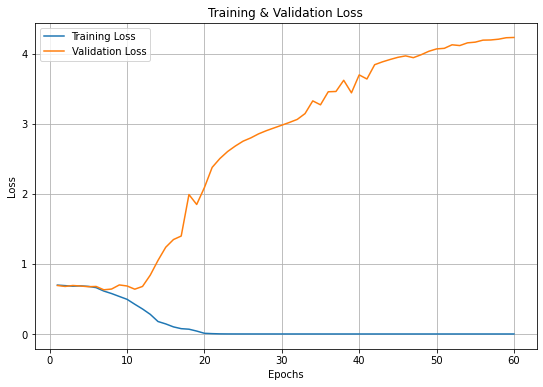

In [20]:
# Loss Visualization

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

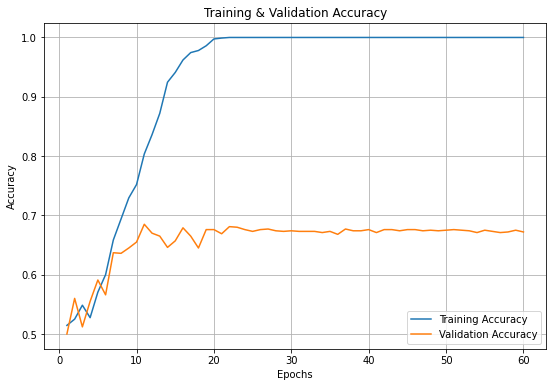

In [21]:
# Accuracy visualization

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

## 5) Model Evaluate

-test_generator

In [22]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.



- Loss & Accuracy 

In [23]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('loss = {:.5f}'.format(loss))
print('accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 69ms/step - loss: 4.3779 - accuracy: 0.6850
loss = 4.37793
accuracy = 0.68500


# 4. Model Save & Load to Google Drive

## 1) google drive mount

In [24]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) Model Save

In [25]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 40561
-rw------- 1 root root    34600 Sep 28 08:10 001_Model_iris.h5
-rw------- 1 root root 41498696 Sep 30 07:41 002_dogs_and_cats_small.h5


## 3) Model Load

In [27]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [28]:
loss, accuracy = model_small.evaluate(test_generator, 
                                      steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 69ms/step - loss: 4.3779 - accuracy: 0.6850
Loss = 4.37793
Accuracy = 0.68500


# THE END